# 고유분해와 특이값 분해

정방 행렬 $A$에 대해 다음 식을 만족하는 단위 벡터 $v$, 스칼라 $\lambda$을 여러 개 찾을 수 있다.

$$ Av = \lambda v $$


* $ A \in \mathbf{R}^{M \times M} $   정방행렬

* $ \lambda \in \mathbf{R} $

* $ v \in \mathbf{R}^{M} $


이러한 실수 $\lambda$를 고유값(eigenvalue), 단위 벡터 $v$ 를 고유벡터(eigenvector) 라고 하며 고유값과 고유벡터를 찾는 작업을 고유분해(eigen-decomposition)라고 한다.


$ A \in \mathbf{R}^{M \times M} $ 에 대해 최대 $M$개의 고유값-고유벡터 쌍이 존재할 수 있다.

예를 들어 다음 행렬 $A$

$$
A=
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
$$
에 대해 다음 단위 벡터와 스칼라 값은 고유벡터-고유값이 된다.

$$\lambda = -1$$

$$
v=
\begin{bmatrix}
\dfrac{1}{\sqrt{2}}  \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
$$

복수 개의 고유 벡터가 존재하는 경우에는 다음과 같이 고유벡터 행렬 $V$와 고유값 행렬 $\Lambda$로 표기할 수 있다.


$$ 
A \left[ v_1 \cdots v_M \right] =
\left[ \lambda_1 v_1 \cdots \lambda_M v_M \right] =
\left[ v_1 \cdots v_M \right] 
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
$$

$$ AV = V\Lambda $$


여기에서 

$$
V = \left[ v_1 \cdots v_M \right]
$$

$$
\Lambda =
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
$$

numpy linalg 서브패키지에서는 고유값과 고유벡터를 구할 수 있는 `eig` 명령을 제공한다. (eigen-decomposition)
정수로 치면 일종의 소인수분해라고 할 수 있다.

In [1]:
w, V = np.linalg.eig(np.array([[1, -2], [2, -3]]))

In [2]:
w

array([-0.99999998, -1.00000002])

In [3]:
V

array([[ 0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

## 대칭 행렬의 고유 분해

행렬 $A$가 대칭(symmetric) 행렬이면 고유값 벡터 행렬 $V$는 다음과 같이 전치 행렬이 역행렬과 같아진다.

$$ V^T V = V V^T = I$$

이 때는 고유 분해가 다음과 같이 표시된다.


$$ A = V\Lambda V^T = \sum_{i=1}^{M} {\lambda_i} v_i v_i^T$$

$$ A^{-1} = V \Lambda^{-1} V^T = \sum_{i=1}^{M} \dfrac{1}{\lambda_i} v_i v_i^T$$

* m개의 matrix의 합을 의미한다. 람다는 각각의 값들이 다르지만 v와 v전치의 곱의 값은 거의 유사하다.
* ||v||=1 이거 무슨 의미? V는 방향만 나타내는 아이이기 때문에 방향만. 크기 상관 없어. 그래서 1이라고 정의한 것이다. 앞에 단위 벡터라고 한 말이 그 말이다.
* 중요한 것들만 남기고 람다는 다 구하는데 큰 람다만 구해서 A랑 거의 비슷한 애들을 구한다. 이게 PCA에서 쓰이는 개념이다. 중요성분이 따로 있다. Principal component라고 한다.

* 공분산 개념. 컴퓨터는 사람 얼굴 사진을 하나의 점으로 본다. 옆에 흐려진 그림은 그 그림 자체가 v1이다. 그렇게 v1부터 vn까지 찾았을 때 서로의 조합으로 x의 특징이 잡혀서 찾을 수 있다. 2개의 조합만으로도 찾을 수 있다. 서로 독립이다.
* http://scikit-learn.org/stable/modules/decomposition.html   // 이 그림에서 사람 얼굴 나온 거

## 확률 변수의 좌표 변환

확률 변수의 공분산 행렬 $\Sigma$ 은 대칭 행렬이므로 위의 관계식이 성립한다. 

따라서 다변수 가우시안 정규 분포의 확률 밀도 함수는 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray}
\mathcal{N}(x \mid \mu, \Sigma) 
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
\end{eqnarray}
$$

즉 변환 행렬 $V^T$로 좌표 변환하면 서로 독립인 성분들로 나누어진다.

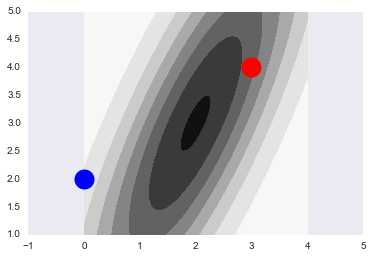

In [4]:
mu = [2, 3]
cov = [[2, 3],[3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu = x2 - mu
plt.plot(x1_mu[0] + mu[0], x1_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2_mu[0] + mu[0], x2_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

In [5]:
w, V = np.linalg.eig(cov)

In [6]:
w

array([ 0.59487516,  8.40512484])

In [7]:
V

array([[-0.90558942, -0.4241554 ],
       [ 0.4241554 , -0.90558942]])

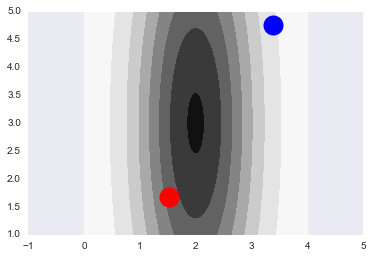

In [8]:
rv = sp.stats.multivariate_normal(mu, w)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu = x2 - mu

x1t_mu = V.T.dot(x1_mu)  # 좌표 변환
x2t_mu = V.T.dot(x2_mu)  # 좌표 변환

plt.plot(x1t_mu[0] + mu[0], x1t_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2t_mu[0] + mu[0], x2t_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

* 독립이냐 아니냐? 잘라서 위 아래가 같을 경우에 독립이었다. 두 함수의 곱으로 나타낼 수 있으면 독립이다. 그래서 지금까지 한 고유벡터(eigenvector)를 통해서 독립인 것으로 만들어 준 작업이다.

* 지금까지 한 개념들은 정방행렬일때만 가능했다. 그러면 정방행렬이 아닐 경우에는? 이럴 때에는 특이값분해에서 적용해 볼 수 있다. 이거는 그냥 있다고만 알아둬라.

## 특이값 분해

정방 행렬이 아닌 행렬 $M$에 대해서도 고유 분해와 유사한 분해가 가능하다. 이를 특이값 분해(singular value decomposition)이라고 한다.


* $M \in \mathbf{R}^{m \times n}$ 

$$M = U \Sigma V^T$$ 

여기에서 
* $U \in \mathbf{R}^{m \times m}$ 
* $\Sigma  \in \mathbf{R}^{m \times n}$  
* $V \in \mathbf{R}^{n \times n}$ 

이고 행렬 $U$와 $V$는 다음 관계를 만족한다.

$$ U^T U = UU^T = I $$
$$ V^T V = VV^T = I $$

예를 들어

$$\mathbf{M} = \begin{bmatrix}
                      1 & 0 & 0 & 0 & 2 \\
                      0 & 0 & 3 & 0 & 0 \\
                      0 & 0 & 0 & 0 & 0 \\
                      0 & 2 & 0 & 0 & 0
                    \end{bmatrix}
$$
에 대한 특이값 분해 결과는 다음과 같다.

$$
\begin{align}
\mathbf{U} &= \begin{bmatrix}
               0 & 0 & 1 &  0 \\
               1 & 0 & 0 &  0 \\
               0 & 0 & 0 & -1 \\
               0 & 1 & 0 &  0 \\
             \end{bmatrix} \\
\boldsymbol{\Sigma} &= \begin{bmatrix}
                        \sqrt{5} & 0 & 0 & 0 & 0 \\
                        0 & 2 & 0 & 0 & 0 \\
                        0 & 0 & 1 & 0 & 0 \\
                        0 & 0 & 0 & 0 & 0
                      \end{bmatrix} \\
\mathbf{V}^T &= \begin{bmatrix}
                           0 & 0 & \sqrt{0.2} & 0 & \sqrt{0.8} \\
                           0 & 1 & 0 & 0 & 0 \\
                           1 & 0 & 0 & 0 & 0 \\
                           0 & 0 & -\sqrt{0.8} & 0 & \sqrt{0.2} \\
                           0 & 0 & 0 & 1 & 0 \\
               \end{bmatrix}
\end{align}$$

이는 다음과 같이 확인 할 수 있다.

$$\begin{align}
\mathbf{U} \mathbf{U^T} &=
   \begin{bmatrix}
               0 & 0 & 1 &  0 \\
               1 & 0 & 0 &  0 \\
               0 & 0 & 0 & -1 \\
               0 & 1 & 0 &  0 \\
             \end{bmatrix}
\cdot
  \begin{bmatrix}
               0 & 1 & 0 & 0 \\
               0 & 0 & 0 & 1 \\
               1 & 0 & 0 & 0 \\
               0 & 0 & -1 & 0 \\
             \end{bmatrix}
   = 
  \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
  \end{bmatrix} 
   = \mathbf{I}_4 \\
\mathbf{V} \mathbf{V^T} &=
  \begin{bmatrix}
                           0 & 0 & \sqrt{0.2} & 0 & \sqrt{0.8} \\
                           0 & 1 & 0 & 0 & 0 \\
                           1 & 0 & 0 & 0 & 0 \\
                           0 & 0 & -\sqrt{0.8} & 0 & \sqrt{0.2} \\
                           0 & 0 & 0 & 1 & 0 \\
               \end{bmatrix}
  \cdot
  \begin{bmatrix}
              0 & 0 & 1 & 0 &          0 \\
              0 & 1 & 0 & 0 &          0 \\
     \sqrt{0.2} & 0 & 0 & -\sqrt{0.8} & 0\\
              0 & 0 & 0 & 0 &          1 \\
     \sqrt{0.8} & 0 & 0 & \sqrt{0.2} & 0 \\
  \end{bmatrix} 
  =
  \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 1
  \end{bmatrix} 
   = \mathbf{I}_5
\end{align}$$


In [9]:
from pprint import pprint
M = np.array([[1,0,0,0,0],[0,0,2,0,3],[0,0,0,0,0],[0,2,0,0,0]])
print("\nM:"); pprint(M)
U, S0, V0 = np.linalg.svd(M, full_matrices=True)
print("\nU:"); pprint(U)
S = np.hstack([np.diag(S0), np.zeros(M.shape[0])[:, np.newaxis]])
print("\nS:"); pprint(S)
print("\nV:"); pprint(V)
V = V0.T
print("\nU.dot(U.T):"); pprint(U.dot(U.T))
print("\nV.dot(V.T):"); pprint(V.dot(V.T))
print("\nU.dot(S).dot(V.T):"); pprint(U.dot(S).dot(V.T))


M:
array([[1, 0, 0, 0, 0],
       [0, 0, 2, 0, 3],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

U:
array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  1.,  0.,  0.]])

S:
array([[ 3.60555128,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

V:
array([[-0.90558942, -0.4241554 ],
       [ 0.4241554 , -0.90558942]])

U.dot(U.T):
array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

V.dot(V.T):
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

U.dot(S).dot(V.T):
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  3.],


# 실습

In [10]:
A = np.array([[0.8, 0.3], [0.2, 0.7]])

In [11]:
L, V = np.linalg.eig(A)

In [12]:
L

array([ 1. ,  0.5])

In [13]:
V

array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]])

In [14]:
l1 = L[0]
l2 = L[1]
v1 = V[:, 0]
v2 = V[:, 1]

In [15]:
v1

array([ 0.83205029,  0.5547002 ])

In [16]:
A.dot(v1)

array([ 0.83205029,  0.5547002 ])

In [17]:
l1 * v1

array([ 0.83205029,  0.5547002 ])

In [18]:
A.dot(v2)

array([-0.35355339,  0.35355339])

In [19]:
l2 * v2

array([-0.35355339,  0.35355339])

### 이번에는 대칭행렬(시메트릭 메트릭스)로 해보겠다.

In [20]:
A = np.array([[2, -1], [-1,2]])

In [21]:
L, V = np.linalg.eig(A)

In [22]:
L

array([ 3.,  1.])

In [23]:
V

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [24]:
l1 = L[0]
l2 = L[1]
v1 = V[:, 0]
v2 = V[:, 1]

In [25]:
A.dot(v1)

array([ 2.12132034, -2.12132034])

In [26]:
l1* v1

array([ 2.12132034, -2.12132034])

In [27]:
A.dot(v2)

array([ 0.70710678,  0.70710678])

In [28]:
l2 * v2

array([ 0.70710678,  0.70710678])

In [29]:
V.dot(V.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

### 이번에도 시메트릭 메트릭스로

In [30]:
A = np.array([[3,1,-1], [1,3,-1], [-1,-1,5]])
A

array([[ 3,  1, -1],
       [ 1,  3, -1],
       [-1, -1,  5]])

In [31]:
L, V = np.linalg.eig(A)
L

array([ 6.,  2.,  3.])

In [32]:
V

array([[ -4.08248290e-01,  -7.07106781e-01,   5.77350269e-01],
       [ -4.08248290e-01,   7.07106781e-01,   5.77350269e-01],
       [  8.16496581e-01,  -1.07392045e-17,   5.77350269e-01]])

In [33]:
l1 = L[0]
l2 = L[1]
l3 = L[2]
v1 = V[:, 0]
v2 = V[:, 1]
v3 = V[:, 2]

In [34]:
A.dot(v1)

array([-2.44948974, -2.44948974,  4.89897949])

In [35]:
l1 * v1

array([-2.44948974, -2.44948974,  4.89897949])

In [36]:
A.dot(v2)

array([ -1.41421356e+00,   1.41421356e+00,  -7.77156117e-16])

In [37]:
l2 * v2

array([ -1.41421356e+00,   1.41421356e+00,  -2.14784090e-17])

In [38]:
A.dot(v3)

array([ 1.73205081,  1.73205081,  1.73205081])

In [39]:
l3 * v3

array([ 1.73205081,  1.73205081,  1.73205081])

In [40]:
V.dot(V.T)

array([[  1.00000000e+00,  -5.55111512e-17,   3.33066907e-16],
       [ -5.55111512e-17,   1.00000000e+00,  -5.55111512e-17],
       [  3.33066907e-16,  -5.55111512e-17,   1.00000000e+00]])

* 레귤러라이제이션을 해줘야 한다. 다중공선성이 생기기 때문에. 여러가지 방법이 있는데 변수를 버리는 방법. 아니면 옵티미제이션 할 때 억지로 라쏘나 릿지를 달아줘서 코에피션스가 안 변하게끔. 안 그러면 데이터 샘플이 조금만 변해도 w값이 훅훅 바뀐다. 그런데 버리는 값을 생각하면 너무 아깝다. 겹치지 않는 성분이 있는데 버리기가 아까워. 그래서 만들어진 것이 PCA개념이다. 버리긴 버리는데 이걸 잘 좌표변환을 해서 최대한 별로 필요 없는 것을 버리자는 개념.
* 람다가 가장 큰 v가 화살표 방향이다. 고유분해(아이덴디콤포지션)을 이용해서 풀어낼 수 있다. 

### 하다가 질문이나 확인할 내용들

* 놈의 개념에서는 스칼라값이라고 할 수 있다. 맞는가? 맞다
* 여기서 이게 선형모델과 같다고 하고. 이것은 경계선을 나타내는 수식
$$f(x) = w^Tx - w_0 = 0$$
* decision function이라는 것이 무슨 의미? 가중합에서 상수를 뺀 것이고 상수는 벡터의 길이라고 하는데
$$ w^Tx - \| w \|^2$$
* 기저벡터에서 오타 아닌가? 그 벡터 집합의 선형 조합으로 나타내지 못한다면 기저 벡터가 되는 것 아닌가? 네. 선형 조합으로 나타낼 수 있을 때 기저벡터가 될 수 없다. 나타낼 수 없을 때, 독립적일 때 기저 벡터가 되는 것이다.
* 노트에서 고유성분해 첫 부분에 크기 달라도 되니 방향만 같게끔. 최대 M개 까지만 찾아진다. 이게 무슨 의미일까? 우리가 찾고자 하는 것은 가장 큰 영향력을 미치는 것을 찾는 것이기 때문
* 상관계수가 0일 때 무상관일 때 독립인지 아닌지와 관련이 없다는 것은 데이터가 무수하기 때문에? 전부다 독립이면 독립인데 관계가 있는 것도 있고 없는 것도 있기 때문에. 맞는 것 같다. 현실 데이터에서 완벽한 독립은 있을 수 없기 때문에